#**THE SPARK FOUNDATION**
#**GRIP-JUIY21**
#**NAME-SANDHYA KANDAGAL** **( Data Science & Business Analytics Intern)**

# **TASK-3 Exploratory Data Analysis -Retail**
##**Dataset-https://bit.ly/3i4rbWl**

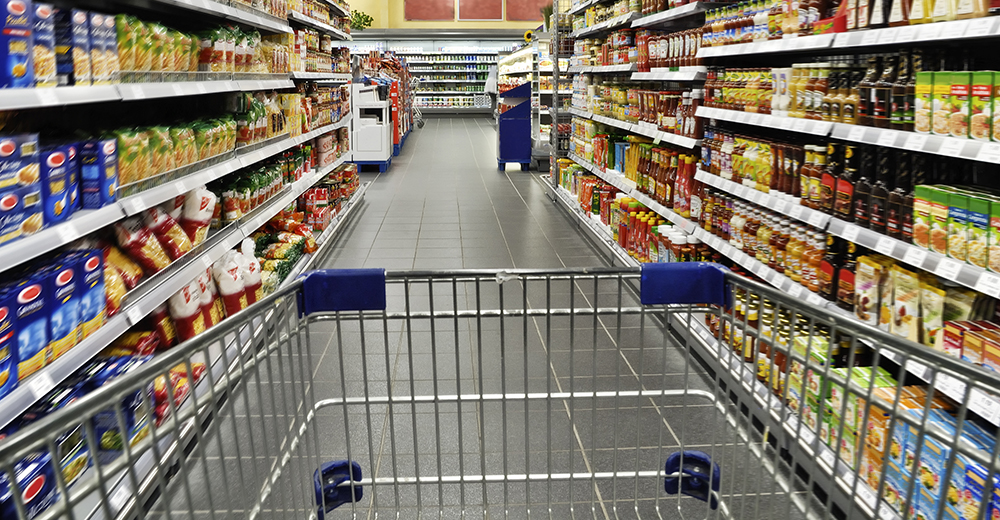


















##**● As a business manager, try to find out the weak areas where you can work to make more profit.** 

##**● What all business problems you can derive by exploring the data?** 

##**IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##**READING THE GIVEN DATASET**
Under standing data


In [2]:
t_data=pd.read_csv("/SampleSuperstore.csv")
print('Data Imported successfully')
t_data.head(5)

Data Imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
t_data.shape

(9994, 13)

###We observe here ,that there are 9994 rows and 13 columns, large dataset.

##**PRINTING THE COLUMNS**

In [4]:
t_data.columns.values

array(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'], dtype=object)

##**CHECKING FOR THE NULL VALUES**

In [5]:
t_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##we observe that there are no null values in the data set.

##**Exploratory Data Analysis**

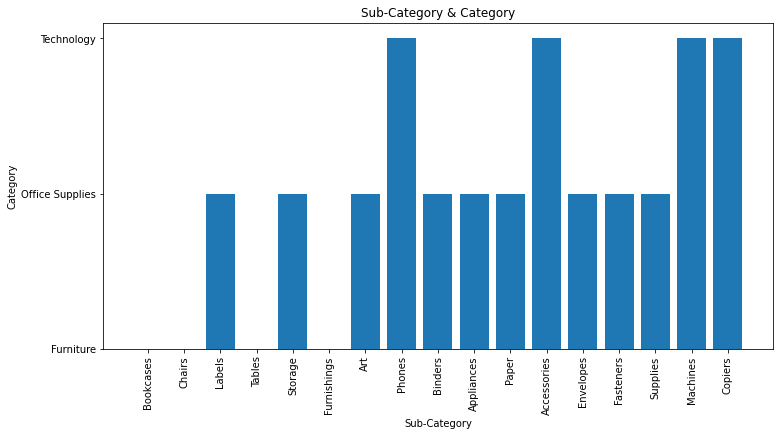

In [10]:
plt.figure(figsize=(12,6))
plt.bar('Sub-Category','Category', data=t_data)
plt.title('Sub-Category & Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.show()

##**Density- Sales Vs Profit**

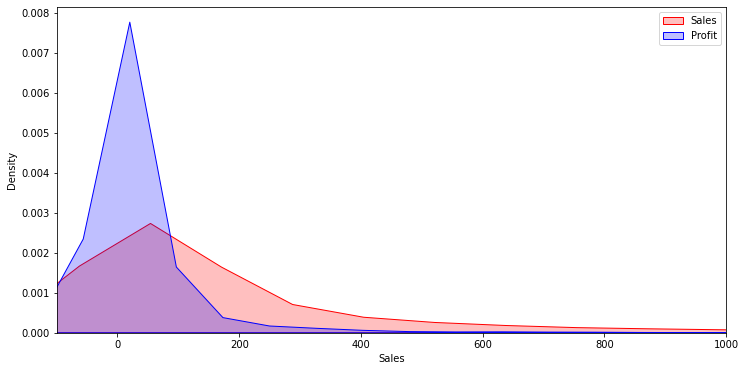

In [17]:
plt.figure(figsize = (12,6))

sns.kdeplot(t_data.Sales, color = 'red', label = 'Sales', shade = True)
sns.kdeplot(t_data.Profit, color = 'blue', label = 'Profit', shade = True)

plt.xlim([-100, 1000])
plt.legend()
plt.show()

##**Plotting the relation between Discount and Profit**

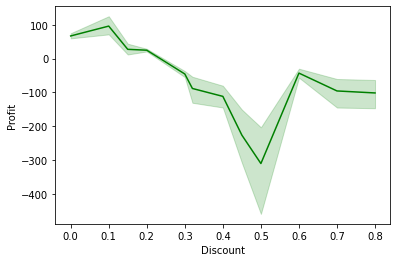

In [19]:
# plotting the relation between Discount and Profit

sns.lineplot(x = 'Discount', y = 'Profit', color = 'g', data = t_data)
plt.show()

##**Correlating the columns**

In [20]:
t_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


##**Plotting the correlation using heatmap**

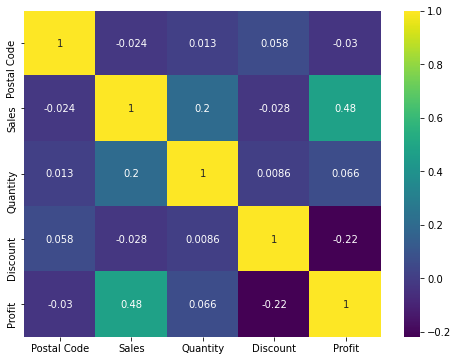

In [22]:
# plotting the correlation using heatmap

plt.figure(figsize=(8,6))
sns.heatmap(t_data.corr(), annot = True, cmap = "viridis")
plt.show()

**Sales and Profit are moderately correlated.**

**Discount and Profit are negatively correlated.**

**Quantity and Sales are less correlated than moderate.**


## **Category wise**


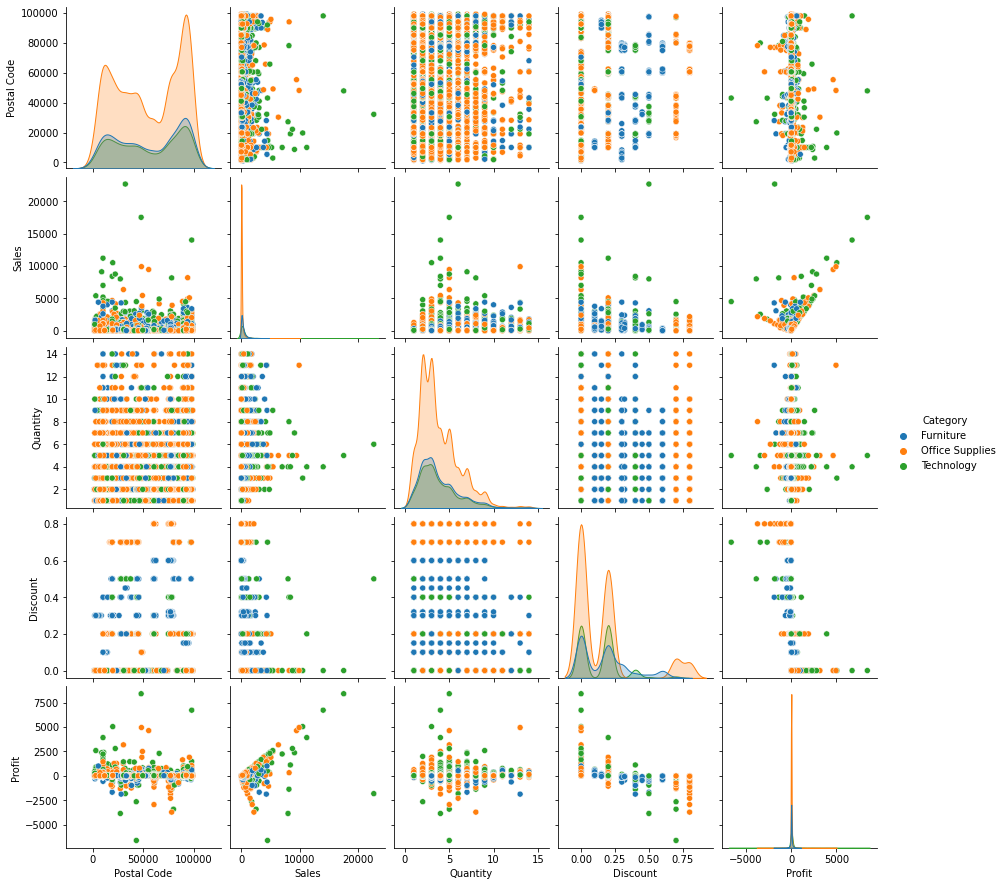

In [23]:
 Category wise

sns.pairplot(t_data, hue = 'Category', palette = "tab10")
plt.show()

##**Region wise**

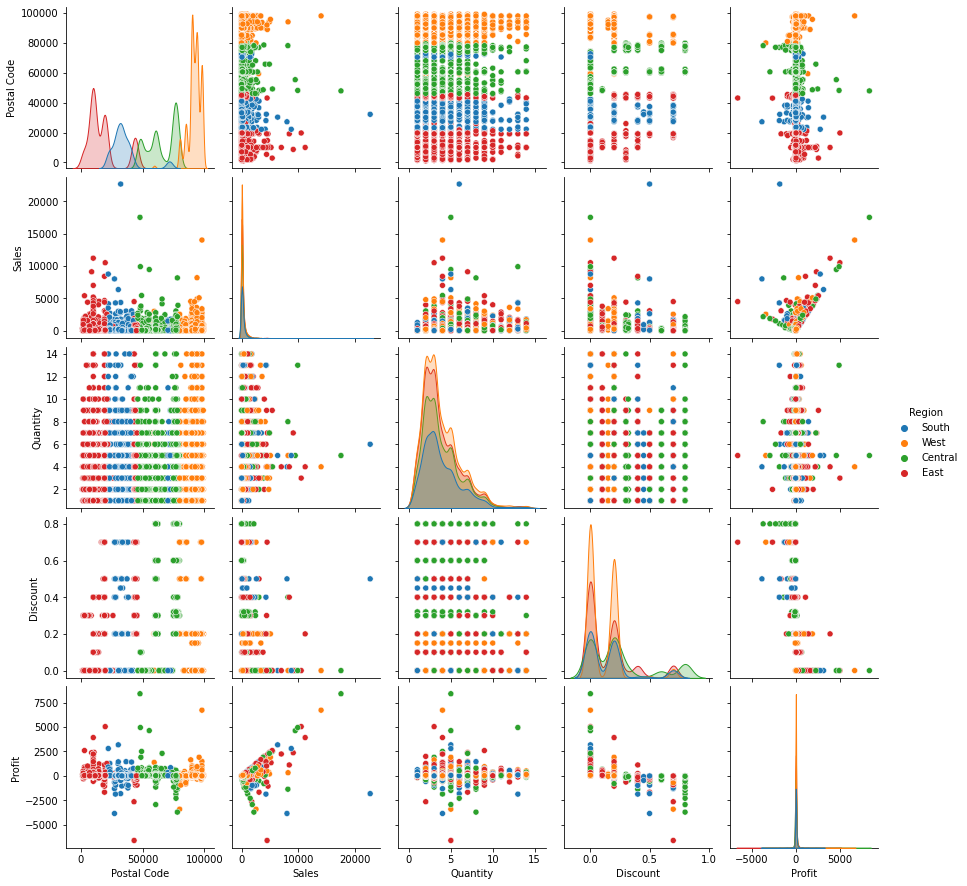

In [25]:
sns.pairplot(t_data, hue = 'Region')
plt.show()

##**Count plot of each column**

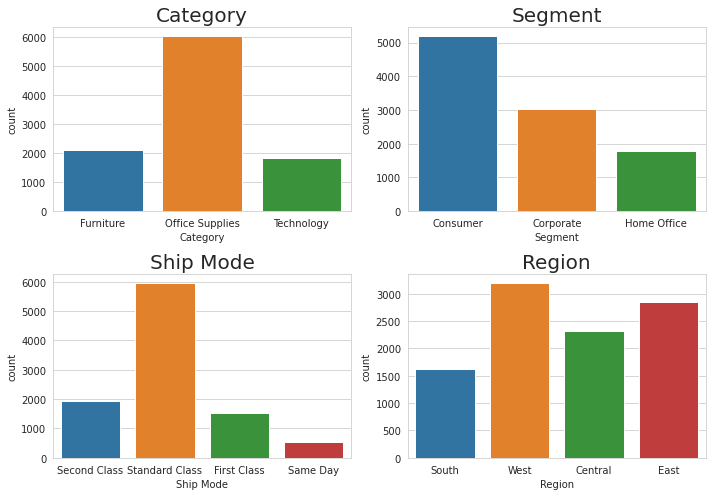

In [26]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

sns.countplot(t_data['Category'], ax = ax[0][0])
ax[0][0].set_title('Category', fontsize = 20)

sns.countplot(t_data['Segment'], ax = ax[0][1])
ax[0][1].set_title('Segment', fontsize = 20)

sns.countplot(t_data['Ship Mode'], ax = ax[1][0])
ax[1][0].set_title('Ship Mode', fontsize = 20)

sns.countplot(t_data['Region'], ax = ax[1][1])
ax[1][1].set_title('Region', fontsize = 20)

plt.tight_layout()

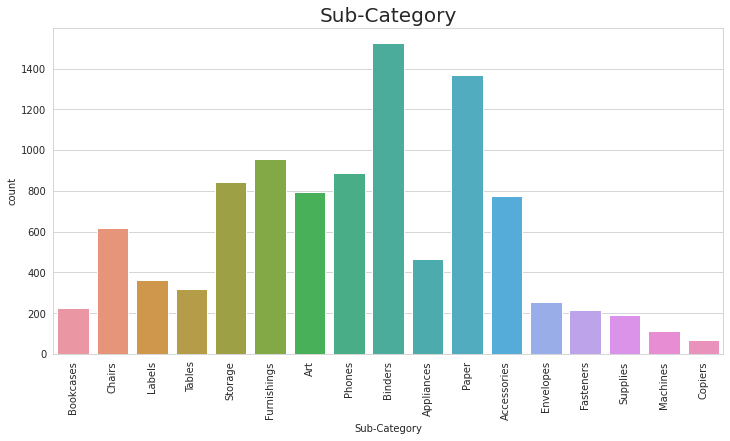

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(t_data['Sub-Category'])
plt.title('Sub-Category', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

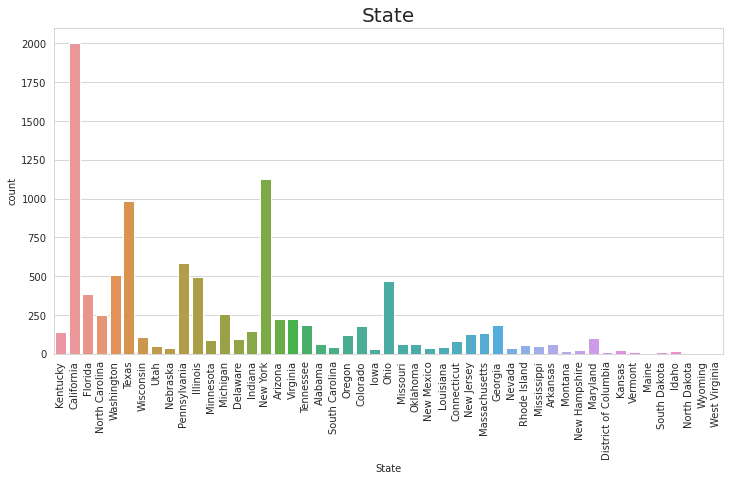

In [31]:
plt.figure(figsize = (12,6))
sns.countplot(t_data['State'])
plt.xticks(rotation = 90)
plt.title('State', fontsize = 20)
plt.show()

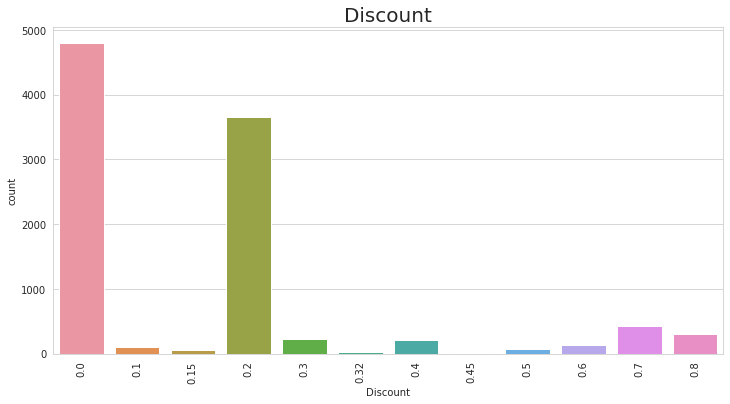

In [34]:
plt.figure(figsize = (12,6))
sns.countplot(t_data['Discount'])
plt.xticks(rotation = 90)
plt.title('Discount', fontsize = 20)
plt.show()

##**Region wise Sales Vs Profits**

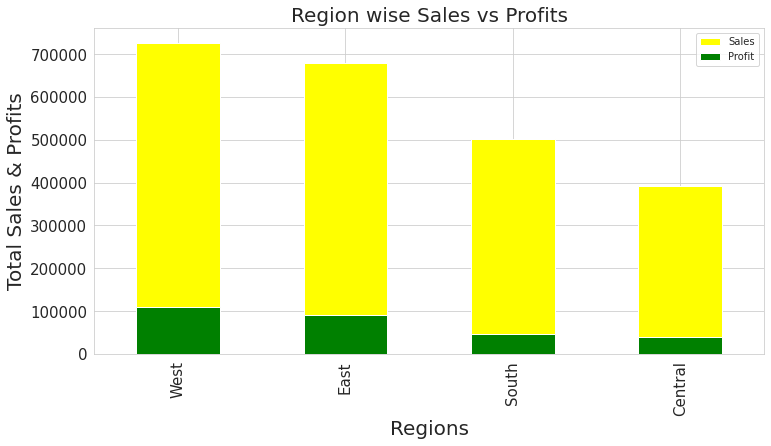

In [38]:
sales =t_data.groupby('Region').sum()['Sales'].sort_values(ascending = False)

profits = t_data.groupby('Region').sum()['Profit'].sort_values(ascending = False)

sales.plot(kind = 'bar', figsize = (12, 6), fontsize = 15, color = 'yellow')
profits.plot(kind = 'bar', figsize = (12,6), fontsize = 15, color = 'green')

plt.xlabel('Regions', fontsize = 20)
plt.ylabel('Total Sales & Profits', fontsize = 20)
plt.title('Region wise Sales vs Profits', fontsize = 20)

plt.legend()
plt.show()

In [43]:
data_city =t_data.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean().sort_values('Profit')
data_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


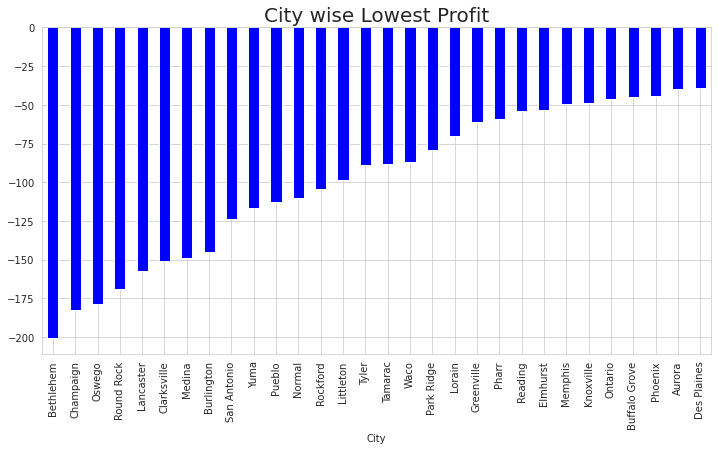

In [47]:
data_city['Profit'].head(30).plot(kind = 'bar', figsize = (12,6), color = 'blue')

plt.title("City wise Lowest Profit", fontsize = 20)
plt.show()

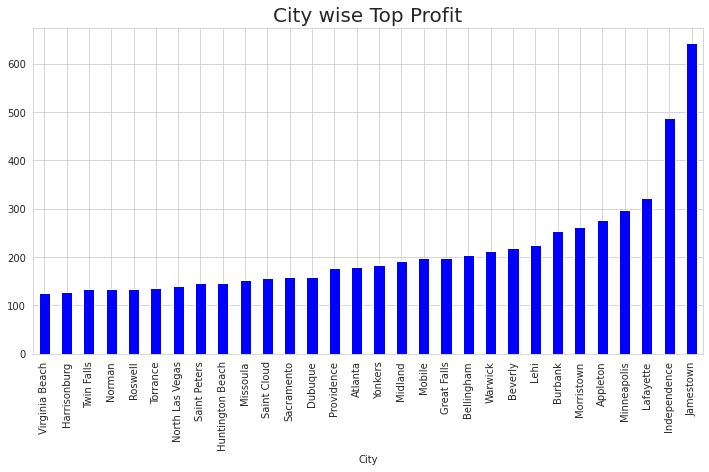

In [48]:

data_city['Profit'].tail(30).plot(kind = 'bar', figsize = (12,6), color = 'blue')

plt.title("City wise Top Profit", fontsize = 20)
plt.show()

**From the above visualization, We can see the states and the category where sales and profits are high or less. We can improve in those states by providing discounts in appropriate range so that the company and customers will both get profit.**



##**THANK YOU**